# __Problem 4.__

Use your cross-validation implementation from above to train a linear SVM for your spam dataset. Please report your C value, the validation error rate, and your Kaggle score. If you mod- ified the spam features, please (briefly) describe what features you added, removed, or modified.

In [2]:
%pylab inline
import sklearn.metrics
import scipy.io
from sklearn import svm
DEBUG=True
spam_data_test = scipy.io.loadmat("data/spam-dataset/spam_data.mat")
test_data = spam_data_test['test_data']
train_data = spam_data_test['training_data']
train_label = spam_data_test['training_labels']

import math
#benchmark.m, converted
def benchmark(pred_labels, true_labels):
    errors = pred_labels != true_labels
    err_rate = sum(errors) / float(len(true_labels))
    indices = errors.nonzero()
    return err_rate, indices
#montage_images.m, converted
def montage_images(images):
    num_images=min(1000,np.size(images,2))
    numrows=math.floor(math.sqrt(num_images))
    numcols=math.ceil(num_images/numrows)
    img=np.zeros((numrows*28,numcols*28));
    for k in range(num_images):
        r = k % numrows
        c = k // numrows
        img[r*28:(r+1)*28,c*28:(c+1)*28]=images[:,:,k];
    return img

Populating the interactive namespace from numpy and matplotlib


Here the features are words, there are 32 words inside featurize.py

In [160]:
#Setting up the problem k=10-fold cross validation
N_total = 5170
k=10
train_data=train_data[:N_total]
batch_size = int(np.ceil(shape(train_data)[0]/float(k)))
if (DEBUG): print batch_size
#Creating a list of 10000 random numbers
s = set()
while len(s) < N_total:
    s.add(random.randint(N_total))
rand_idx=np.array(list(s))
np.random.shuffle(rand_idx)

#Creating a gigantic array of all the training sets, grouped by each batch (fold)
mega_train_subset=[]
mega_labels_subset=[]
#Looping through each fold
for i in np.arange(k)+1:
#     print "Batch {}".format(i)
    train_subset = []
    labels_subset = []
    #Merge data for each batch into one
    for idx in rand_idx[(i-1)*batch_size:i*batch_size]:
        train_subset.append(list(train_data)[idx].tolist())
        labels_subset.append(list(train_label)[0][idx].tolist())
    train_subset = np.array(train_subset, dtype=uint8)
    labels_subset = np.array(labels_subset, dtype=uint8)
#     print shape(train_subset)
#     print shape(labels_subset)
    mega_train_subset.append(train_subset)
    mega_labels_subset.append(labels_subset)
mega_train_subset = np.array(mega_train_subset)
mega_labels_subset = np.array(mega_labels_subset)
if (DEBUG): print shape(mega_train_subset)
if (DEBUG): print shape(mega_labels_subset)

517


In [191]:
mse_lst_for_diff_C = []
# C_list = [1e-5,1e-2,1,10,100,1000,1e5,1e8,1e10,1e20] 
# C_list = [1e-6,1e-5, 1e-4,5e-4,1e-3,5e-3, 1e-2]
# C_list = [5e-3, 1e-2,1e-1,1,10]
# C_list = [1,10,100,100]
# C_list = [2,5,8,10,15,20,40,60,80,100]
# C_list = [60,70,80,90,100]
C_list = np.arange(80,100,2)
for c in C_list:
    print "Testing C={}".format(c)
    mse_err_lst=[]
    for k_th_set in np.arange(k):
        #selecting the kth element for verification set
        verify_data = mega_train_subset[k_th_set]
        verify_labels = mega_labels_subset[k_th_set]
        #select only the ones EXCLUDING the kth element for training
        train_data = np.concatenate((mega_train_subset[:k_th_set-1,:,:],mega_train_subset[k_th_set:,:,:]))
        #Merging all the kth batches into one large datafile 
        train_data =  train_data.reshape((shape( train_data)[0]*batch_size,shape(train_data)[2]))
        train_labels = np.concatenate((mega_labels_subset[:k_th_set-1],mega_labels_subset[k_th_set:]))
        train_labels = train_labels.reshape((shape(train_labels)[0]*batch_size,))
#         print shape(train_labels)[0]*batch_size
#         print shape(train_data)
#         print shape(train_labels)
#         clf = svm.SVC(kernel="linear", C=c)
        clf = svm.LinearSVC(C=c)
        clf.fit(train_data,train_labels)
        result = clf.predict(verify_data)
        mse = benchmark(verify_labels, result)[0]
#         print mse
        mse_err_lst.append(mse)
#     print "average mse: ", mean(mse_err_lst)
    mse_lst_for_diff_C.append(mean(mse_err_lst))

Testing C=80
Testing C=82
Testing C=84
Testing C=86
Testing C=88
Testing C=90
Testing C=92
Testing C=94
Testing C=96
Testing C=98


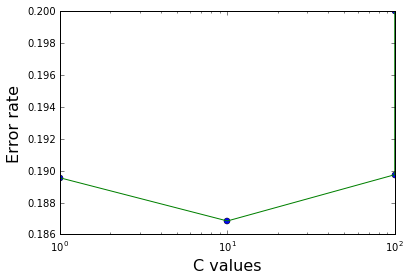

In [184]:
plt.xlabel("C values",fontsize=16)
plt.ylabel("Error rate",fontsize=16)
plt.semilogx(C_list,mse_lst_for_diff_C,'o')
plt.semilogx(C_list,mse_lst_for_diff_C,'-')

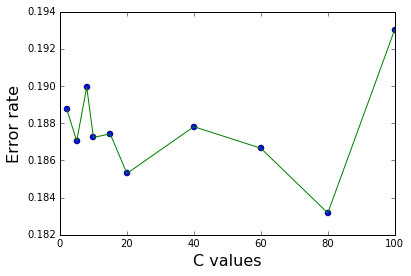

In [187]:
plt.xlabel("C values",fontsize=16)
plt.ylabel("Error rate",fontsize=16)
plt.plot(C_list,mse_lst_for_diff_C,'o')
plt.plot(C_list,mse_lst_for_diff_C,'-')

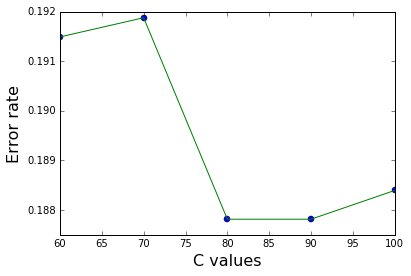

In [189]:
plt.xlabel("C values",fontsize=16)
plt.ylabel("Error rate",fontsize=16)
plt.plot(C_list,mse_lst_for_diff_C,'o')
plt.plot(C_list,mse_lst_for_diff_C,'-')

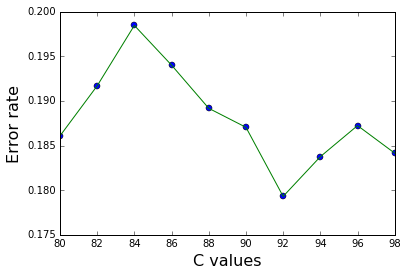

In [192]:
plt.xlabel("C values",fontsize=16)
plt.ylabel("Error rate",fontsize=16)
plt.plot(C_list,mse_lst_for_diff_C,'o')
plt.plot(C_list,mse_lst_for_diff_C,'-')

So the best C value that minimizes the error is __92__

In [199]:
spam_data_test = scipy.io.loadmat("data/spam-dataset/spam_data.mat")
test_data = spam_data_test['test_data']
clf = svm.LinearSVC(C=92)
clf.fit(train_data,train_labels)
result = clf.predict(test_data)
a = numpy.array([np.arange(1,5858),result],dtype=np.int64).T
print shape(a)
numpy.savetxt("Submission_Spam.csv", a, delimiter=",",fmt='%i')

LinearSVC(C=92, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

#### Added more features: words "cheap", "medication","discount"

I added the features "cheap","medication" and "discount" in the feature.py to generate a new spam_data.mat dataset that included these feature (35 dimensions). However, my validation score decreased due to this. I removed the feature "discount" because it showed up many times in both ham and spam, whereas "cheap" and "medication" had many emails in the spam/ directory but only one or two emails in the ham/ directory. 

In [14]:
spam_data_test = scipy.io.loadmat("data/spam-dataset/spam_data.mat")
test_data = spam_data_test['test_data']
train_data = spam_data_test['training_data']
train_label = spam_data_test['training_labels']
clf = svm.LinearSVC(C=92)
clf.fit(train_data,train_label[0])
result = clf.predict(test_data)
a = numpy.array([np.arange(1,5858),result],dtype=np.int64).T
print shape(a)
numpy.savetxt("Submission_Spam2.csv", a, delimiter=",",fmt='%i')

#### Removed discount from feature 

In [1]:
spam_data_test = scipy.io.loadmat("data/spam-dataset/spam_data.mat")
test_data = spam_data_test['test_data']
train_data = spam_data_test['training_data']
train_label = spam_data_test['training_labels']
clf = svm.LinearSVC(C=92)
clf.fit(train_data,train_label[0])
result = clf.predict(test_data)
a = numpy.array([np.arange(1,5858),result],dtype=np.int64).T
print shape(a)
# numpy.savetxt("Submission_Spam3.csv", a, delimiter=",",fmt='%i')

NameError: name 'scipy' is not defined

#References

- "1.4. Support Vector Machines." 1.4. Support Vector Machines — _Scikit-learn 0.17 Documentation_. N.p., n.d. Web. 01 Feb. 2016.
- Markham, Kevin. "Simple Guide to Confusion Matrix Terminology." _Data School_. N.p., 25 Mar. 2014. Web. 01 Feb. 2016.
- "Confusion Matrix." Confusion Matrix — _Scikit-learn 0.17 Documentation_. N.p., n.d. Web. 02 Feb. 2016.
- James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. "Chapter 5 Resampling Methods." _An Introduction to Statistical Learning: With Applications in R_. N.p.: Springer, n.d. 180-83. Print.
- "Confusion Matrix." Confusion Matrix — _Scikit-learn 0.17 Documentation_. N.p., n.d. Web. 04 Feb. 2016.